In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr

In [3]:
CancerData = pd.read_excel('Project_Data/cancer patient data sets.xlsx')
#CancerDataUpdate = pd.read_excel('Project_Data/cancer patient data sets update.xlsx')


In [4]:
CancerData.head

<bound method NDFrame.head of     Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0            

In [5]:
CancerData.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

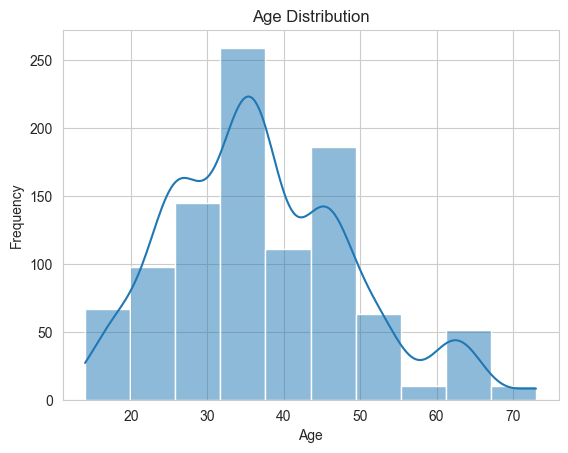

In [6]:
sns.histplot(CancerData['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


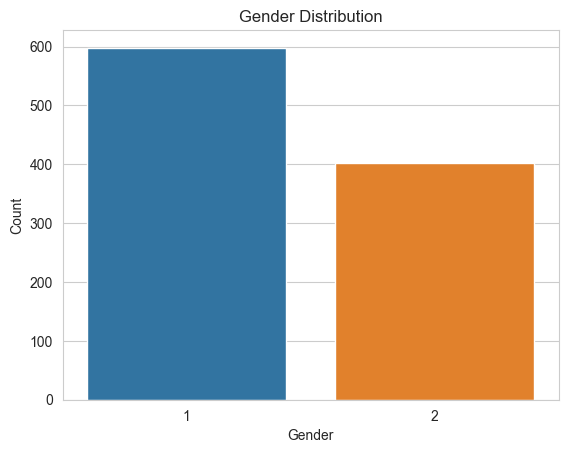

In [7]:
sns.countplot(x='Gender', data=CancerData)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


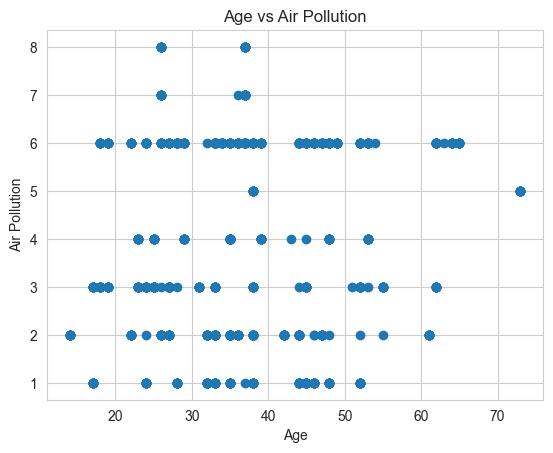

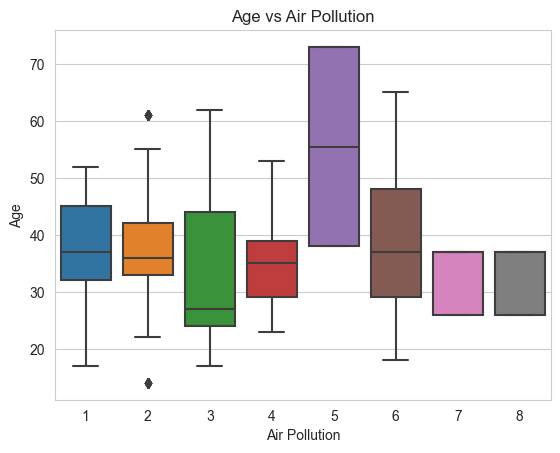

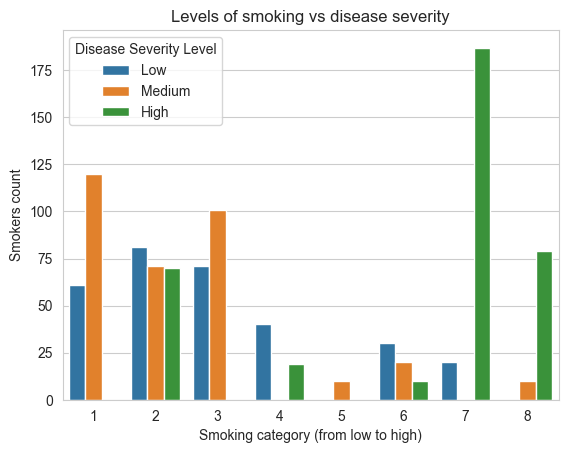

In [8]:
plt.scatter(CancerData['Age'], CancerData['Air Pollution'])
plt.title('Age vs Air Pollution')
plt.xlabel('Age')
plt.ylabel('Air Pollution')
plt.show()

sns.boxplot(x = CancerData['Air Pollution'], y = CancerData['Age'])
plt.title('Age vs Air Pollution')
plt.ylabel('Age')
plt.xlabel('Air Pollution')
plt.show()

sns.countplot(x = CancerData['Smoking'], hue = CancerData['Level'], )
plt.title('Levels of smoking vs disease severity')
plt.legend(title='Disease Severity Level')
plt.xlabel('Smoking category (from low to high)')
plt.ylabel('Smokers count')
plt.show()

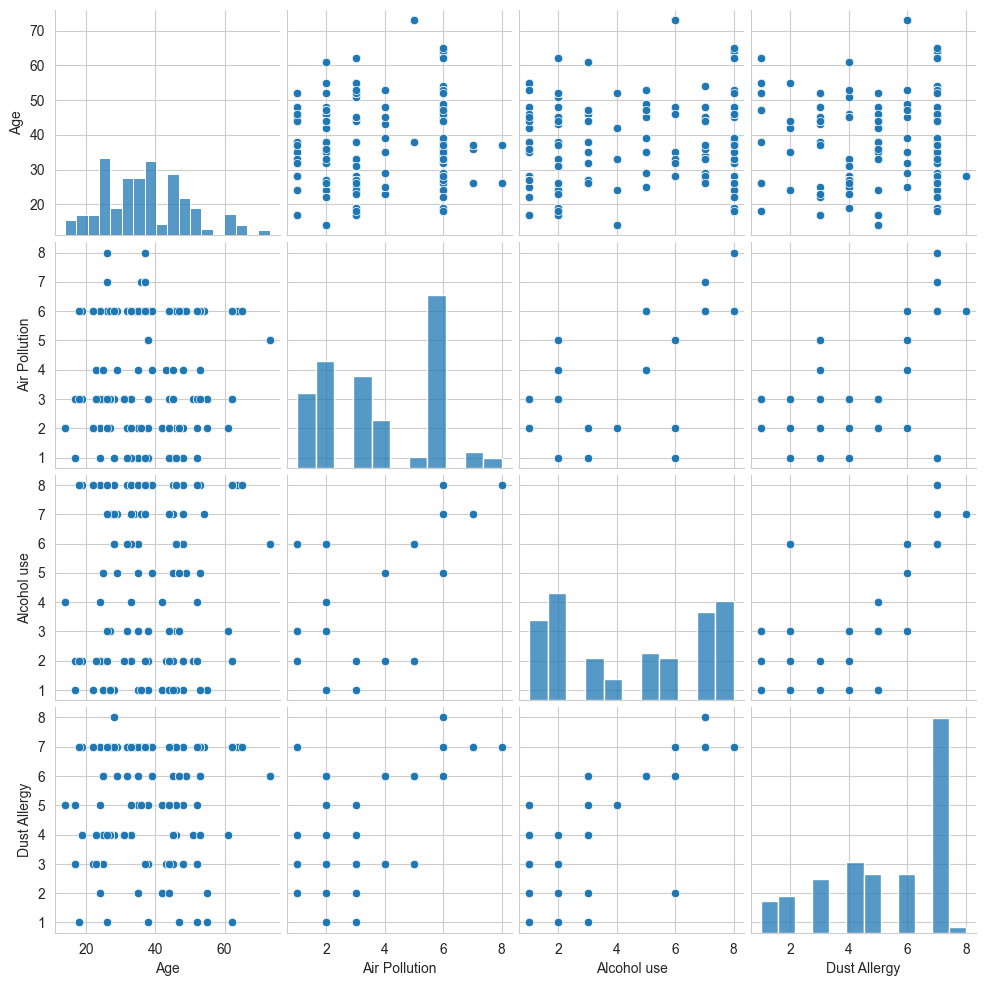

In [9]:
sns.pairplot(CancerData[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy']])
plt.show()


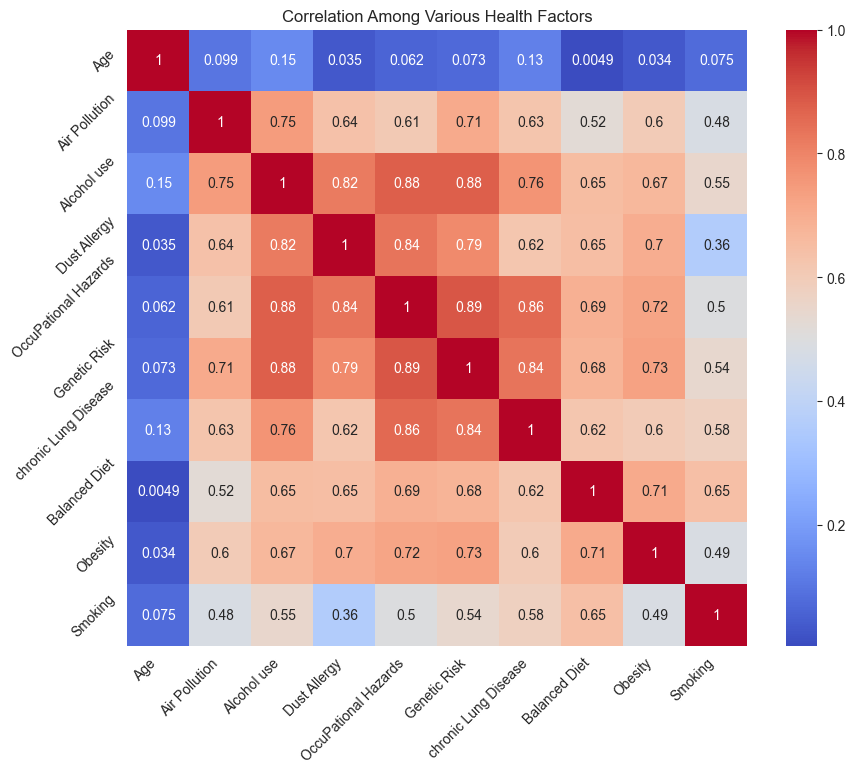

In [10]:
plt.figure(figsize=(10, 8))
corr = CancerData[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


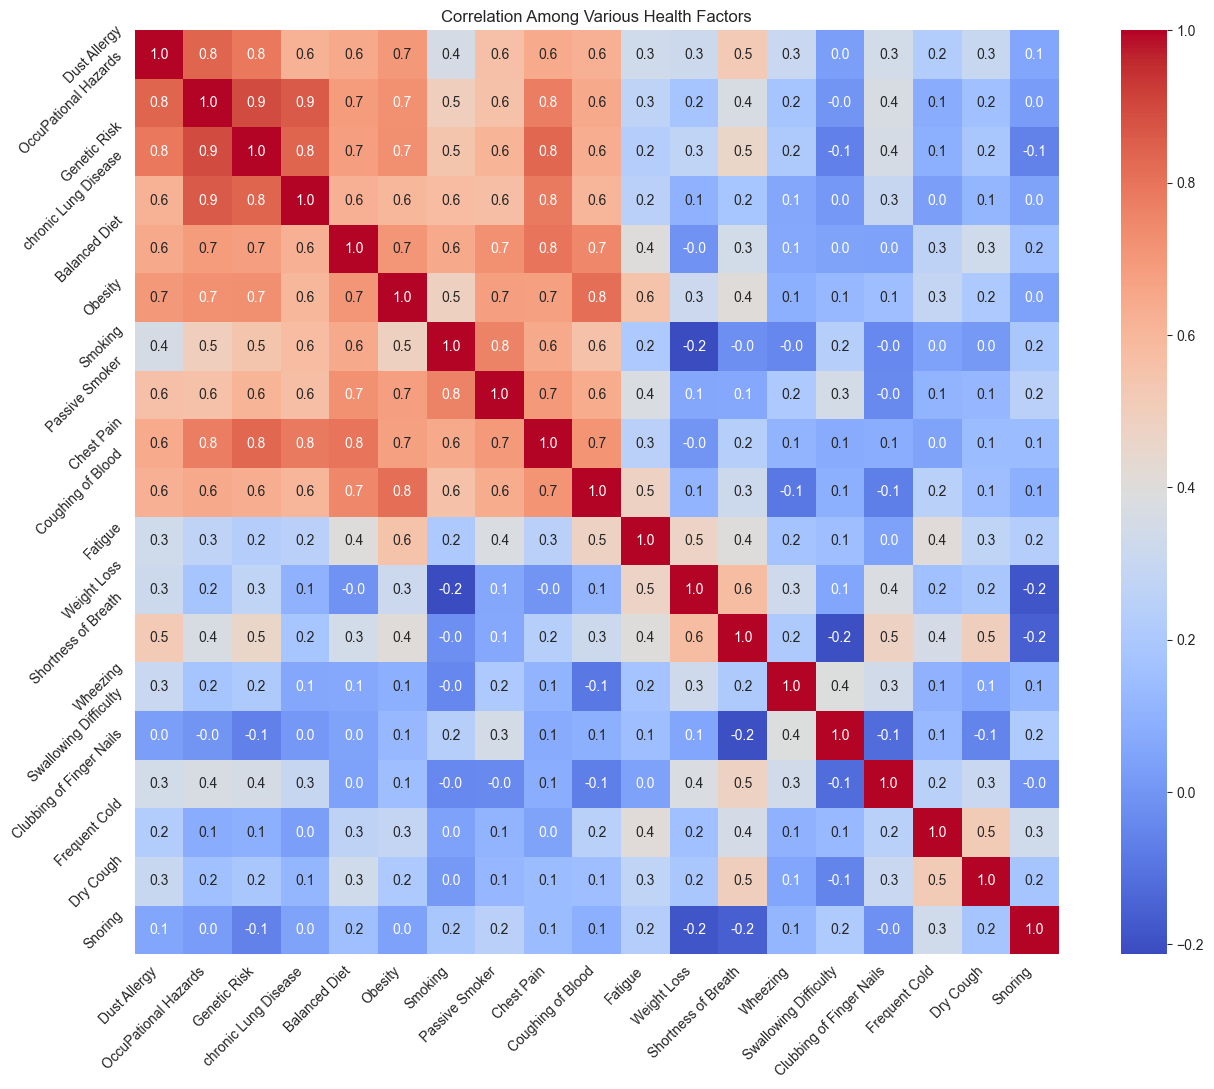

In [11]:
plt.figure(figsize=(16, 12))  # Increased figure size for readability with more variables
corr = CancerData[['Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
                   'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
                   'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
                   'Weight Loss', 'Shortness of Breath', 'Wheezing',
                   'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
                   'Dry Cough', 'Snoring']].corr()  # Selected all listed attributes
sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', square=True)
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


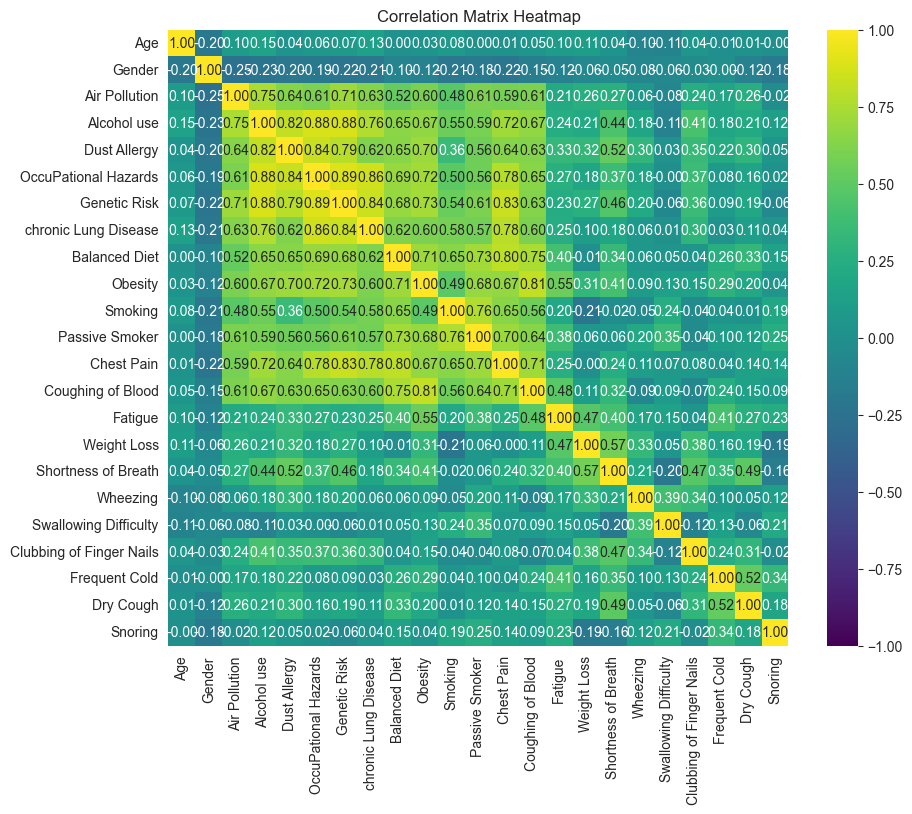

In [12]:
corr = CancerData.corr()  # Computes the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

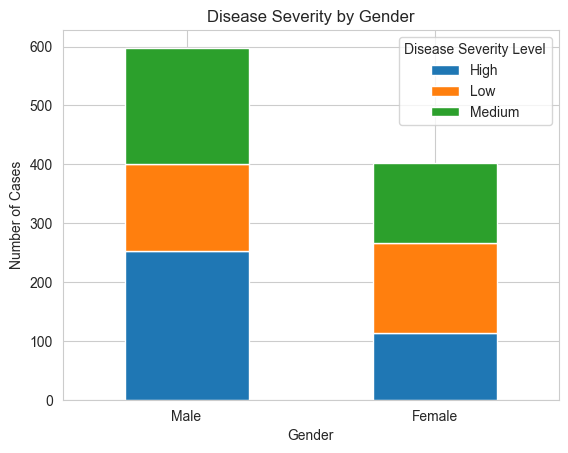

In [13]:
# more tables
pd.crosstab(CancerData['Gender'], CancerData['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level')
plt.show()


In [14]:
print(CancerData.isnull().values.any())

False


In [15]:
print(CancerData.isnull().sum())


Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [16]:
CancerData.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

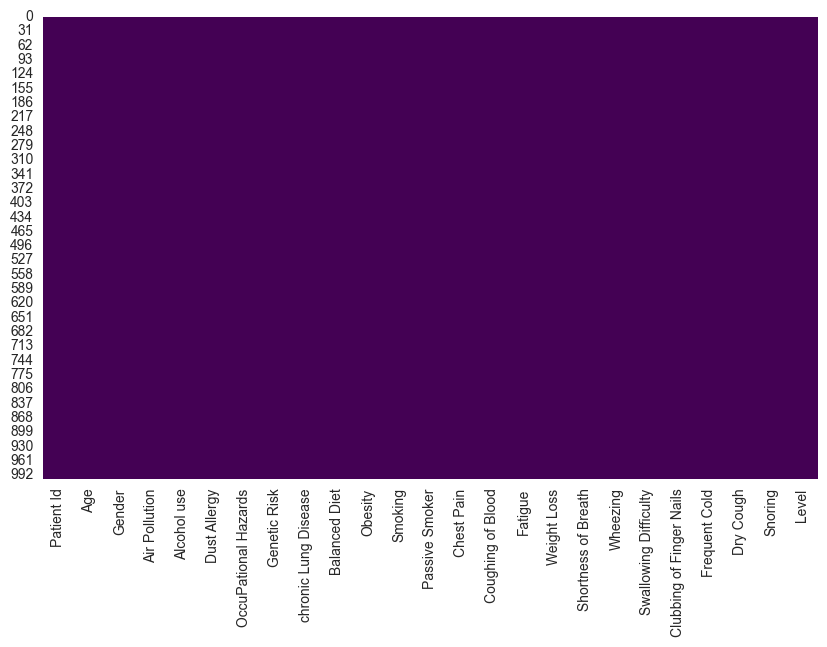

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(CancerData.isnull(), cbar=False, cmap='viridis')
plt.show()


In [18]:
from scipy.stats import pearsonr
import pandas as pd

# Assuming CancerData is your DataFrame
significant_corrs_list = []  # Use a list to collect rows

for col1 in CancerData.select_dtypes(include=['float64', 'int64', 'int32']).columns:
    for col2 in CancerData.select_dtypes(include=['float64', 'int64', 'int32']).columns:
        if col1 != col2:
            corr_coef, p_value = pearsonr(CancerData[col1].dropna(), CancerData[col2].dropna())
            if p_value < 0.05:  # Adjust your significance level here
                significant_corrs_list.append({
                    'Variable 1': col1,
                    'Variable 2': col2,
                    'Correlation Coefficient': corr_coef,
                    'P-Value': p_value
                })

# Convert the list of dicts to a DataFrame
significant_corrs = pd.DataFrame(significant_corrs_list)

print(significant_corrs.sort_values('P-Value'))


                Variable 1             Variable 2  Correlation Coefficient  \
94    OccuPational Hazards           Genetic Risk                 0.893049   
114           Genetic Risk   OccuPational Hazards                 0.893049   
92    OccuPational Hazards            Alcohol use                 0.878786   
52             Alcohol use   OccuPational Hazards                 0.878786   
112           Genetic Risk            Alcohol use                 0.877210   
..                     ...                    ...                      ...   
216         Passive Smoker    Shortness of Breath                 0.062948   
126           Genetic Risk  Swallowing Difficulty                -0.062948   
340  Swallowing Difficulty           Genetic Risk                -0.062948   
3                      Age   OccuPational Hazards                 0.062177   
89    OccuPational Hazards                    Age                 0.062177   

           P-Value  
94    0.000000e+00  
114   0.000000e+00  


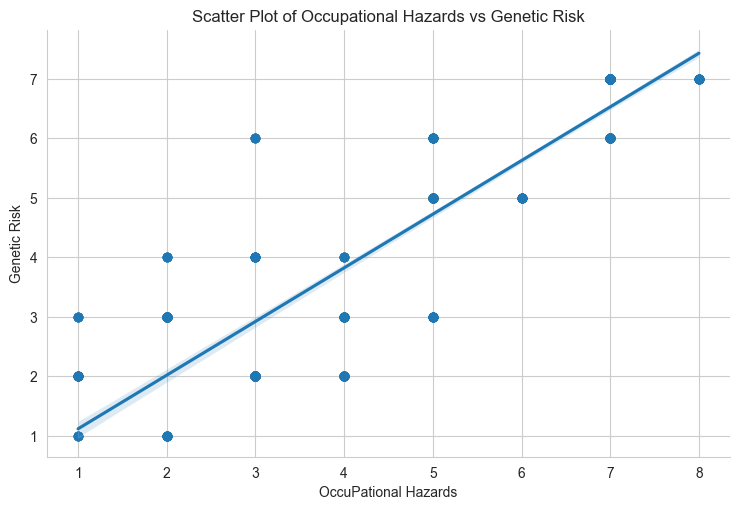

In [19]:
sns.lmplot(x='OccuPational Hazards', y='Genetic Risk', data=CancerData, aspect=1.5, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()


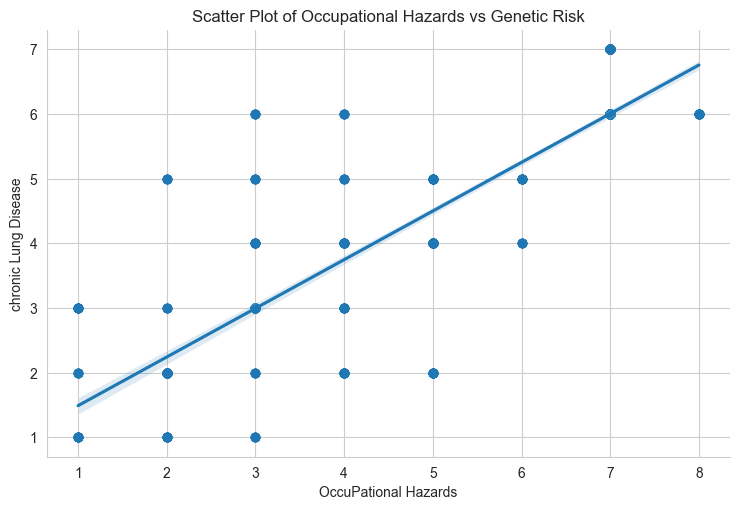

In [20]:

sns.lmplot(x='OccuPational Hazards', y='chronic Lung Disease', data=CancerData, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Occupational Hazards vs Genetic Risk')
plt.show()

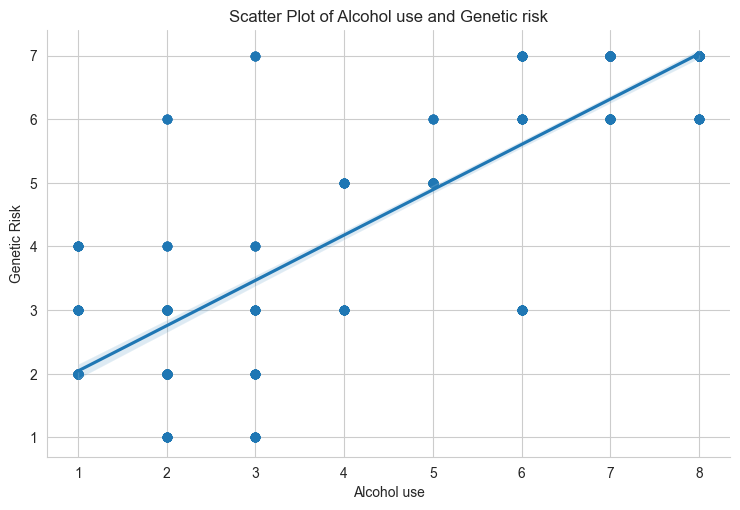

In [21]:

sns.lmplot(x='Alcohol use', y='Genetic Risk', data=CancerData, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title('Scatter Plot of Alcohol use and Genetic risk')
plt.show()

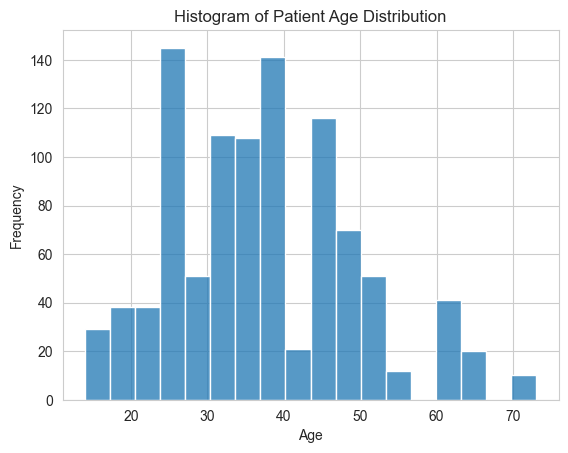

In [22]:
# Assuming 'Age' is your column name
sns.histplot(CancerData['Age'], kde=False)
plt.title('Histogram of Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [23]:
# Assuming 'PatientID' is the column name for patient IDs in your CancerDataUpdate DataFrame.
# Exclude the patient ID column and any other non-relevant columns, then calculate the correlation matrix.

# You may need to adjust this if your DataFrame has different column names for patient IDs or other identifiers.
numeric_data = CancerDataUpdate.drop(['Patient Id'], axis=1, errors='ignore')

# Calculate the correlation matrix on the numeric data only
corr = numeric_data.corr()

# Now you can plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Health Factors')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()  # This will adjust the layout to prevent cutting off the edges
plt.show()


NameError: name 'CancerDataUpdate' is not defined

In [ ]:
# Let's assume 'Obesity' is significantly correlated with 'Level'
sns.barplot(x='Level', y='Obesity', data=CancerDataUpdate, estimator=np.mean, ci=None)
plt.title('Average Obesity by Disease Level')
plt.show()


In [ ]:
# If 'Genetic Risk' shows a strong correlation with 'Level'
sns.regplot(x='Level', y='Genetic Risk', data=CancerDataUpdate, fit_reg=True)
plt.title('Genetic Risk by Disease Level')
plt.show()


In [ ]:
# Example: Violin plot for 'Genetic Risk' by 'Level'
sns.violinplot(x='Level', y='Genetic Risk', data=CancerDataUpdate)
plt.title('Genetic Risk Distribution Across Disease Levels')
plt.show()


In [ ]:
# Example: Scatter plot for 'Fatigue' and 'Weight Loss' with hue by 'Level'
sns.scatterplot(x='Obesity', y='Genetic Risk', hue='Level', data=CancerDataUpdate)
plt.title('Relationship Between Fatigue and Weight Loss Across Disease Levels')
plt.show()


In [ ]:
# Example: Pair plot for a subset of health factors
subset = CancerDataUpdate[['chronic Lung Disease', 'Obesity', 'Smoking', 'Level']]
sns.pairplot(subset, hue='Level')
plt.show()


#### Here the predictive analytics start
Once the problem you want to tackle has been assessed and refined, you can proceed with the predictive analytics part. As a reminder, the main goal of predictive analytics is to build a predictive model in order to be able to make predictions on unseen data, based on the informative content of the existing data.
Required activities
- Identify the target variable y for the predictive problem at hand
- Analyze the distribution of the target variable y: Is it balanced or unbalanced?
- Split the available data into a training-testing-validation set.
o The training set will be used to train the predictive model.
o The testing set will be used to assess the model performance.
o The validation set is a subset of data which will be set aside (unseen from the
model) and used to simulate the future data that the model will need to predict.
- According to the defined problem (regression/binary classification/multiclass classification)
o Select at least two different appropriate performance metrics
o Assess one baseline model and at least three different supervised predictive
models using the aforementioned performance metric
- (Optionally) Employ unsupervised techniques to further extract insights from the data
- Critically discuss the modeling choices and the outcomes of the previous steps.
Note: Please note that developing a prototype is, by definition, an iterative process, so don’t be afraid to
go back to problem definition and adjust it as you gain a better understanding of the problem at hand.

In [25]:
import pandas as pd

# Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Assuming 'Level' is the target variable
target_counts = data['Level'].value_counts()

# Check if the target variable is balanced or unbalanced
if len(target_counts) == 2:
    # If there are exactly two classes, we consider it balanced if the ratio between the classes is within a certain threshold
    class_ratio = target_counts.iloc[0] / target_counts.iloc[1]
    threshold = 0.5  # You can adjust this threshold based on your requirements
    if 1 - threshold <= class_ratio <= 1 + threshold:
        print("The target variable 'Level' is balanced.")
    else:
        print("The target variable 'Level' is unbalanced.")
else:
    # If there are more than two classes, we consider it balanced if each class has approximately the same number of samples
    min_samples = target_counts.min()
    max_samples = target_counts.max()
    threshold = 0.8 
    if min_samples / max_samples >= threshold:
        print("The target variable 'Level' is balanced.")
    else:
        print("The target variable 'Level' is unbalanced.")


The target variable 'Level' is balanced.


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

names = ["Naive Bayesian Model",
    "Logistic Regression",
    "Decision Tree",
    "Random Forest"]

classifiers = [GaussianNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
]

# Step 1: Load the dataset
data = pd.read_excel('Project_Data/cancer patient data sets.xlsx')

# Step 2: Data preprocessing
# Assuming 'Level' is the target variable
X = data.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data['Level']  # Target

# Step 3: Feature selection (you can replace this with your own feature selection technique)
# For demonstration, let's use all features
selected_features = X.columns

# Step 4: Split the dataset into training, validation and testing sets

# First, split the data into training and temporary (remaining) data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

# Now we have X_train_temp, X_val, X_test for features and y_train_temp, y_val, y_test for targets
# X_train_temp is the training data, X_val is the validation data, and X_test is the test data

# Now you have X_train, X_valid for features and y_train, y_valid for targets
# X_train is your finalized training data, and X_valid is your validation data

# You can print the sizes of the datasets to confirm the splits
print("Training data size:", X_train.shape)
print("Validation data size:", X_valid.shape)
print("Test data size:", X_test.shape)

# Creating empty DFs
accuracy_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)
balanced_accuracy_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)
f1_score_per_dataset_df = pd.DataFrame(columns=["Dataset Name"] + names)

# Concatenating the DataFrames
accuracy_per_dataset_df = pd.concat([accuracy_per_dataset_df] * len(names), ignore_index=True)
balanced_accuracy_per_dataset_df = pd.concat([balanced_accuracy_per_dataset_df] * len(names), ignore_index=True)
f1_score_per_dataset_df = pd.concat([f1_score_per_dataset_df] * len(names), ignore_index=True)

# For each dataset split, train the classifiers and evaluate
for technique in ["Ordinal Encoding"]:
    print("[INFO] - Categorical technique: ", technique)
    accuracy_line = {"Dataset Name": technique}
    balanced_accuracy_line = {"Dataset Name": technique}
    f1_score_line = {"Dataset Name": technique}
    
    for classifier, method_name in zip(classifiers, names):
        print("[INFO] - Classifier: ", method_name)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy_line[method_name] = accuracy_score(y_test, y_pred)
        balanced_accuracy_line[method_name] = balanced_accuracy_score(y_test, y_pred)
        f1_score_line[method_name] = f1_score(y_test, y_pred, average=None)
        
    # Append the lines to the DataFrames
    accuracy_per_dataset_df = pd.concat([accuracy_per_dataset_df, pd.DataFrame([accuracy_line])], ignore_index=True)
    balanced_accuracy_per_dataset_df = pd.concat([balanced_accuracy_per_dataset_df, pd.DataFrame([balanced_accuracy_line])], ignore_index=True)
    f1_score_per_dataset_df = pd.concat([f1_score_per_dataset_df, pd.DataFrame([f1_score_line])], ignore_index=True)

# Step 6: Model evaluation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Example new data (replace this with your own new data)
new_data = pd.DataFrame({
    'Age': [45],
    'Gender': [1],
    'Air Pollution': [3],
    'Alcohol use': [2],
    'Dust Allergy': [4],
    'OccuPational Hazards': [5],
    'Genetic Risk': [6],
    'chronic Lung Disease': [3],
    'Balanced Diet': [7],
    'Obesity': [4],
    'Smoking': [6],
    'Passive Smoker': [2],
    'Chest Pain': [1],
    'Coughing of Blood': [1],
    'Fatigue': [2],
    'Weight Loss': [1],
    'Shortness of Breath': [3],
    'Wheezing': [2],
    'Swallowing Difficulty': [1],
    'Clubbing of Finger Nails': [1],
    'Frequent Cold': [2],
    'Dry Cough': [1],
    'Snoring': [3]
})

Training data size: (700, 23)
Validation data size: (150, 23)
Test data size: (150, 23)
[INFO] - Categorical technique:  Ordinal Encoding
[INFO] - Classifier:  Naive Bayesian Model
[INFO] - Classifier:  Logistic Regression
[INFO] - Classifier:  Decision Tree
[INFO] - Classifier:  Random Forest
Accuracy: 1.0


/Users/julian/PycharmProjects/Responsible_Data_Analysis_Group_1/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**In this section, the Fairness tools will be looked at**

the category used for the fairness tools will be the severity of cancer. 
this category is called 'level' and is divided in low - medium - high. 
because Aequitas needs a binary variable low will be grouped as 0 and
medium and high will be grouped together as 1. 

In [27]:
#Here aequitas will be installed
!pip install aequitas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [28]:
# in case you have Attributeerror: module ‘pil.image’ has no attribute ‘resampling’!
#!pip install Pillow==9.1.0 

In [29]:
#Here, we ensure that all packages are present to perform the code and work with aequitas.
#group, bias and fairness are important

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
import aequitas.plot as ap

In [30]:
#Using the test data generated in the predictive approach, first take a look at the data
print(f' this is X_test:{X_test}')
print(f' this is y_test: {y_test}')
print(f' this is y_pred: {y_pred}')

 this is X_test:     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
557   62       1              6            8             7   
798   53       2              4            5             6   
977   45       1              3            1             4   
136   65       1              6            8             7   
575   24       1              6            8             7   
..   ...     ...            ...          ...           ...   
731   44       1              2            1             5   
445   48       1              6            7             7   
292   44       1              1            2             3   
947   38       1              2            3             5   
67    33       2              1            6             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
557                     7             7                     6              2   
798                     5             5                     4              6   

In [31]:
#To be able to form one dataframe the types will be investigated
print(type(y_pred))
print(type(y_test))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [32]:
#Also, to ensure that the rows have equal amounts in the dataframe and thus can align, the number of rows will be shown

num_rows = len(y_pred)
print("Number of rows:", num_rows)

num_rows = len(y_test)
print("Number of rows:", num_rows)

num_rows2 = len(X_test)
print('Number of rows X_test:', num_rows2)

Number of rows: 150
Number of rows: 150
Number of rows X_test: 150


In [33]:
# Here the y_test will be added to the X_test already existing dataframe
# Extra check if the lengths match
if len(X_test) == len(y_test):
    # Add the Series as a new column to the DataFrame
    X_test['y_test'] = y_test.values
    # Print the DataFrame to verify the changes
    print(X_test)
else:
    print("Lengths of DataFrame and Series do not match.")

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
557   62       1              6            8             7   
798   53       2              4            5             6   
977   45       1              3            1             4   
136   65       1              6            8             7   
575   24       1              6            8             7   
..   ...     ...            ...          ...           ...   
731   44       1              2            1             5   
445   48       1              6            7             7   
292   44       1              1            2             3   
947   38       1              2            3             5   
67    33       2              1            6             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
557                     7             7                     6              2   
798                     5             5                     4              6   
977            

In [34]:
# Here the y_pred will be added to the X_test already existing dataframe
# Check if the lengths match
if len(X_test) == len(y_pred):
    # Add the NumPy array as a new column to the DataFrame
    X_test['y_pred'] = y_pred
    # Print the DataFrame to verify the changes
    print(X_test)
else:
    print("Lengths of DataFrame and NumPy array do not match.")

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
557   62       1              6            8             7   
798   53       2              4            5             6   
977   45       1              3            1             4   
136   65       1              6            8             7   
575   24       1              6            8             7   
..   ...     ...            ...          ...           ...   
731   44       1              2            1             5   
445   48       1              6            7             7   
292   44       1              1            2             3   
947   38       1              2            3             5   
67    33       2              1            6             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
557                     7             7                     6              2   
798                     5             5                     4              6   
977            

In [35]:
# Rename the DataFrame
dfbias = X_test.copy()

# Print the DataFrame to verify the changes
print(dfbias)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
557   62       1              6            8             7   
798   53       2              4            5             6   
977   45       1              3            1             4   
136   65       1              6            8             7   
575   24       1              6            8             7   
..   ...     ...            ...          ...           ...   
731   44       1              2            1             5   
445   48       1              6            7             7   
292   44       1              1            2             3   
947   38       1              2            3             5   
67    33       2              1            6             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
557                     7             7                     6              2   
798                     5             5                     4              6   
977            

In [36]:
#change the last columns name, the predictions column to 'Prediction'
# Rename the column from '0' to 'Prediction'
dfbias = dfbias.rename(columns={'y_pred': 'Prediction'})

# Print the DataFrame with the renamed column

dfbias

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,y_test,Prediction
557,62,1,6,8,7,7,7,6,2,4,...,7,6,5,1,9,3,4,2,Medium,Medium
798,53,2,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,High,High
977,45,1,3,1,4,3,2,3,4,3,...,2,2,4,2,2,3,4,3,Low,Low
136,65,1,6,8,7,7,7,6,2,4,...,7,6,5,1,9,3,4,2,Medium,Medium
575,24,1,6,8,7,7,6,7,7,3,...,2,5,2,3,2,1,7,6,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,44,1,2,1,5,3,2,3,2,4,...,7,2,5,8,1,3,2,3,Medium,Medium
445,48,1,6,7,7,7,7,6,7,7,...,3,2,7,8,2,4,5,3,High,High
292,44,1,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,5,Medium,Medium
947,38,1,2,3,5,2,1,1,1,1,...,1,3,4,6,1,3,2,2,Low,Low


In [37]:
#Possibly removing of rows with missing data

# Remove rows with missing data (NaN values)
dfbias_clean = dfbias.dropna()

# Print the cleaned DataFrame
print(dfbias_clean)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
557   62       1              6            8             7   
798   53       2              4            5             6   
977   45       1              3            1             4   
136   65       1              6            8             7   
575   24       1              6            8             7   
..   ...     ...            ...          ...           ...   
731   44       1              2            1             5   
445   48       1              6            7             7   
292   44       1              1            2             3   
947   38       1              2            3             5   
67    33       2              1            6             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
557                     7             7                     6              2   
798                     5             5                     4              6   
977            

Now to decide what we use as sensitive data:

The columns that will be used are:
'Age', 'Gender', 'OccuPational Hazards', 'Weight Loss' and 'Level'

In [38]:
#Change 'y_test' column values of Low = 0 and Medium and High = 1

#Make a copy of the dataframe
dfbias_clean_copy = dfbias_clean.copy()

mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Replace values in the 'Level' column using the mapping dictionary
dfbias_clean_copy['y_test'] = dfbias_clean_copy['y_test'].replace(mapping)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)


     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
557   62       1              6            8             7   
798   53       2              4            5             6   
977   45       1              3            1             4   
136   65       1              6            8             7   
575   24       1              6            8             7   
..   ...     ...            ...          ...           ...   
731   44       1              2            1             5   
445   48       1              6            7             7   
292   44       1              1            2             3   
947   38       1              2            3             5   
67    33       2              1            6             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
557                     7             7                     6              2   
798                     5             5                     4              6   
977            

The unique values of age are: [14, 17, 18, 19, 22, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 42, 44, 45, 46, 47, 48, 49, 52, 53, 55, 62, 64, 65, 73]


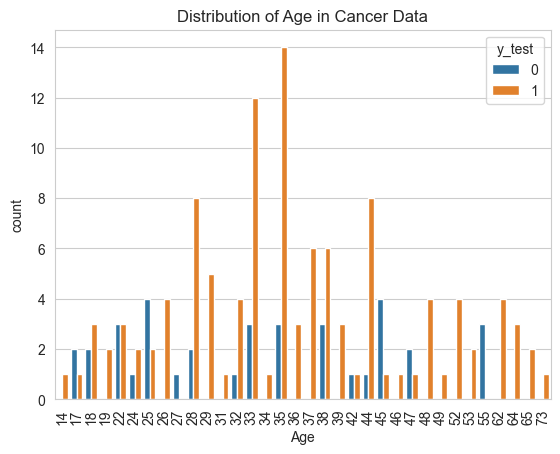

In [39]:
#First Age

# Extract unique values 
Age_values = dfbias_clean_copy['Age'].unique()
#order the values 
Age_values_sorted = sorted(Age_values)
print(f"The unique values of age are: {Age_values_sorted}")

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Age', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Adjust the rotation angle as needed


# Show the plot
plt.show()



The unique values of gender are: [1, 2]


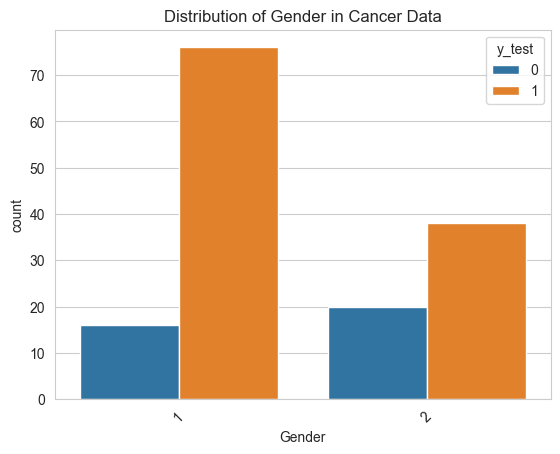

In [40]:
#Second Gender

# Extract unique values 
Gender_values = dfbias_clean_copy['Gender'].unique()
Gender_values_sorted = sorted(Gender_values)
print(f"The unique values of gender are: {Gender_values_sorted}")



# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Gender', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed


# Show the plot
plt.show()

The unique values of Occupational Hazards are: [1, 2, 3, 4, 5, 6, 7, 8]


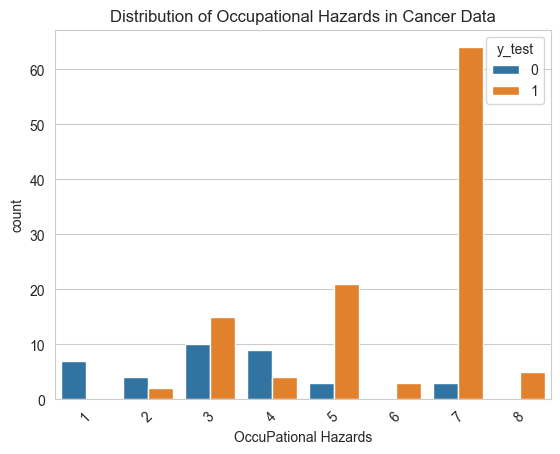

In [41]:
#Third OccuPational Hazards
# Extract unique values 
Occ_values = dfbias_clean_copy['OccuPational Hazards'].unique()
#order the values 
Occ_values_sorted = sorted(Occ_values)
print(f"The unique values of Occupational Hazards are: {Occ_values_sorted}")


# Adding labels and title
plt.xlabel('Occ. Hazard')
plt.ylabel('Count')
plt.title('Distribution of Occupational Hazards in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='OccuPational Hazards', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed


# Show the plot
plt.show()






The unique values of Weight are: [1, 2, 3, 4, 5, 6, 7, 8]


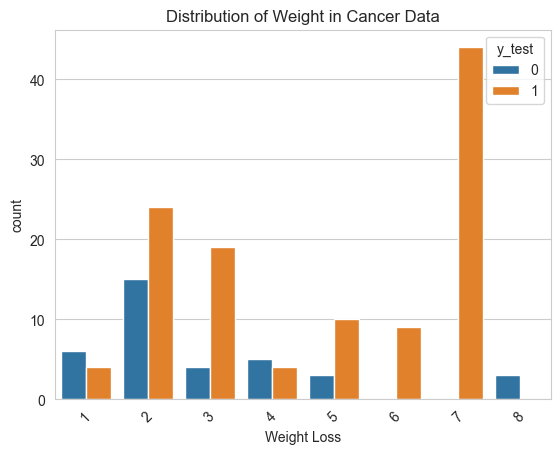

In [42]:
#Fourth Weight Loss

Weight_values = dfbias_clean_copy['Weight Loss'].unique()
#order the values 
Weight_values_sorted = sorted(Weight_values)
print(f"The unique values of Weight are: {Weight_values_sorted}")

# Adding labels and title
plt.xlabel('Weight')
plt.ylabel('Count')
plt.title('Distribution of Weight in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Weight Loss', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed


# Show the plot
plt.show()


In [43]:
#change the column names from 'Predictive' to 'Score' and change the values of medium and high to 1, low to 0
#change 'y_test' to 'label_value'

# Change the column names
# Rename the columns
dfbias_clean_copy.rename(columns={'y_test': 'label_value', 'Prediction': 'score'}, inplace=True)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
557   62       1              6            8             7   
798   53       2              4            5             6   
977   45       1              3            1             4   
136   65       1              6            8             7   
575   24       1              6            8             7   
..   ...     ...            ...          ...           ...   
731   44       1              2            1             5   
445   48       1              6            7             7   
292   44       1              1            2             3   
947   38       1              2            3             5   
67    33       2              1            6             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
557                     7             7                     6              2   
798                     5             5                     4              6   
977            

In [44]:
#Change the values of Low = 0 and Medium and High = 1

# Define mapping dictionary
#mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Map values in the 'label_value' column
#dfbias_clean['label_value'] = dfbias_clean['label_value'].map(mapping)

# Print the DataFrame with updated values
#print(dfbias_clean)


In [45]:
#Change the values of Low = 0 and Medium and High = 1, for the column score

# Define the mapping dictionary
mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Replace values in the 'score' column using the mapping dictionary
dfbias_clean_copy['score'] = dfbias_clean_copy['score'].replace(mapping)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)

     Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
557   62       1              6            8             7   
798   53       2              4            5             6   
977   45       1              3            1             4   
136   65       1              6            8             7   
575   24       1              6            8             7   
..   ...     ...            ...          ...           ...   
731   44       1              2            1             5   
445   48       1              6            7             7   
292   44       1              1            2             3   
947   38       1              2            3             5   
67    33       2              1            6             7   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
557                     7             7                     6              2   
798                     5             5                     4              6   
977            

In [46]:
#Next test it with the score and the label_value column

In [47]:
# Create a copy of dfbias_clean_copy to work with
dfSTR = dfbias_clean_copy.copy()

# List of columns to exclude from conversion
exclude_columns = ['label_value', 'score']

# Convert all columns except 'label_value' and 'score' to string type (To make sure it is compatible)
for column in dfSTR.columns:
    if column not in exclude_columns:
        dfSTR[column] = dfSTR[column].astype(str)

# Print the new DataFrame dfSTR
print(dfSTR.dtypes)

Age                         object
Gender                      object
Air Pollution               object
Alcohol use                 object
Dust Allergy                object
OccuPational Hazards        object
Genetic Risk                object
chronic Lung Disease        object
Balanced Diet               object
Obesity                     object
Smoking                     object
Passive Smoker              object
Chest Pain                  object
Coughing of Blood           object
Fatigue                     object
Weight Loss                 object
Shortness of Breath         object
Wheezing                    object
Swallowing Difficulty       object
Clubbing of Finger Nails    object
Frequent Cold               object
Dry Cough                   object
Snoring                     object
label_value                  int64
score                        int64
dtype: object


In [48]:


group = Group()
xtab, _ = group.get_crosstabs(dfSTR)



In [49]:


absolute_metrics = group.list_absolute_metrics(xtab)




In [50]:


xtab[[col for col in xtab.columns if col not in absolute_metrics]]



,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,114,Age,14,1,0,0,0,0,1,1,0,1,150
1,0,binary 0/1,114,Age,17,1,2,0,0,2,1,1,2,3,150
2,0,binary 0/1,114,Age,18,3,2,0,0,2,3,3,2,5,150
3,0,binary 0/1,114,Age,19,2,0,0,0,0,2,2,0,2,150
4,0,binary 0/1,114,Age,22,3,3,0,0,3,3,3,3,6,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,binary 0/1,114,Snoring,3,28,5,0,0,5,28,28,5,33,150
196,0,binary 0/1,114,Snoring,4,11,4,0,0,4,11,11,4,15,150
197,0,binary 0/1,114,Snoring,5,21,0,0,0,0,21,21,0,21,150
198,0,binary 0/1,114,Snoring,6,5,0,0,0,0,5,5,0,5,150


In [51]:

xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)



,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Age,14,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.01,1.00,1.00
1,Age,17,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.01,0.33,0.33
2,Age,18,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.03,0.60,0.60
3,Age,19,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.02,1.00,1.00
4,Age,22,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.03,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Snoring,3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.25,0.85,0.85
196,Snoring,4,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.10,0.73,0.73
197,Snoring,5,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.18,1.00,1.00
198,Snoring,6,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.04,1.00,1.00


In [52]:
# Since almost everything is in levels of 8, there will be categories made per attribute. These will be in the form of low, medium, high, where low will be the categories 1,2,3 medium 3, 4, 5 and high 6, 7, 8 

#create a new dataframe a copy of the previous one to make categories, using df bias_clean_copy because here the types are still integers
#show types
print(dfbias_clean_copy.dtypes)

#create a new dataframe
catdf = dfbias_clean_copy.copy()

catdf



Age                         int64
Gender                      int64
Air Pollution               int64
Alcohol use                 int64
Dust Allergy                int64
OccuPational Hazards        int64
Genetic Risk                int64
chronic Lung Disease        int64
Balanced Diet               int64
Obesity                     int64
Smoking                     int64
Passive Smoker              int64
Chest Pain                  int64
Coughing of Blood           int64
Fatigue                     int64
Weight Loss                 int64
Shortness of Breath         int64
Wheezing                    int64
Swallowing Difficulty       int64
Clubbing of Finger Nails    int64
Frequent Cold               int64
Dry Cough                   int64
Snoring                     int64
label_value                 int64
score                       int64
dtype: object


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,label_value,score
557,62,1,6,8,7,7,7,6,2,4,...,7,6,5,1,9,3,4,2,1,1
798,53,2,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,1,1
977,45,1,3,1,4,3,2,3,4,3,...,2,2,4,2,2,3,4,3,0,0
136,65,1,6,8,7,7,7,6,2,4,...,7,6,5,1,9,3,4,2,1,1
575,24,1,6,8,7,7,6,7,7,3,...,2,5,2,3,2,1,7,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,44,1,2,1,5,3,2,3,2,4,...,7,2,5,8,1,3,2,3,1,1
445,48,1,6,7,7,7,7,6,7,7,...,3,2,7,8,2,4,5,3,1,1
292,44,1,1,2,3,4,2,4,3,3,...,1,2,4,6,5,4,2,5,1,1
947,38,1,2,3,5,2,1,1,1,1,...,1,3,4,6,1,3,2,2,0,0


In [53]:
#As mentioned before, not all columns will be used for this analysis, therefore other columns have to be dropped, the columns that will stay are, Age, Gender, OccuPational Hazards and Weight Loss

catdf.drop(columns=['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring', ], inplace=True)

print(catdf)


     Age  Gender  OccuPational Hazards  Weight Loss  label_value  score
557   62       1                     7            7            1      1
798   53       2                     5            7            1      1
977   45       1                     3            2            0      0
136   65       1                     7            7            1      1
575   24       1                     7            2            1      1
..   ...     ...                   ...          ...          ...    ...
731   44       1                     3            7            1      1
445   48       1                     7            3            1      1
292   44       1                     4            1            1      1
947   38       1                     2            1            0      0
67    33       2                     8            2            1      1

[150 rows x 6 columns]


In [54]:
# Find the minimum values of all columns
min_values = catdf.min()

# Find the maximum values of all columns
max_values = catdf.max()

# Print the minimum and maximum values of all columns
print("Minimum values:")
print(min_values)
print("Maximum values:")
print(max_values)


Minimum values:
Age                     14
Gender                   1
OccuPational Hazards     1
Weight Loss              1
label_value              0
score                    0
dtype: int64
Maximum values:
Age                     73
Gender                   2
OccuPational Hazards     8
Weight Loss              8
label_value              1
score                    1
dtype: int64


In [55]:
# Define the bins and labels for the Age column, create 3 categories for ages below 33, between 33 and 44 and higher than 44, respectively in 'LowAge', 'MediumAge', 'HighAge'
bins = [-float('inf'), 33, 44, float('inf')]
labels = ['LowAge', 'MediumAge', 'HighAge']

# Use pd.cut() to categorize the ages into bins
catdf['Age_Category'] = pd.cut(catdf['Age'], bins=bins, labels=labels, right=False)

#and remove the Age column
catdf.drop(columns=['Age'], inplace=True)

# Print the DataFrame to verify the changes
print(catdf)

     Gender  OccuPational Hazards  Weight Loss  label_value  score  \
557       1                     7            7            1      1   
798       2                     5            7            1      1   
977       1                     3            2            0      0   
136       1                     7            7            1      1   
575       1                     7            2            1      1   
..      ...                   ...          ...          ...    ...   
731       1                     3            7            1      1   
445       1                     7            3            1      1   
292       1                     4            1            1      1   
947       1                     2            1            0      0   
67        2                     8            2            1      1   

    Age_Category  
557      HighAge  
798      HighAge  
977      HighAge  
136      HighAge  
575       LowAge  
..           ...  
731      HighAge  
445    

In [56]:
# Define the mapping dictionary
mapping = {1: 'LowOHaz', 2: 'LowOHaz', 3: 'LowOHaz',
           4: 'MedOHaz', 5: 'MedOHaz',
           6: 'HighOHaz', 7: 'HighOHaz', 8: 'HighOHaz'}

# Replace values in the 'Occupational Hazards' column using the mapping dictionary
catdf['OccuPational Hazards'] = catdf['OccuPational Hazards'].replace(mapping)

# Print the DataFrame to verify the changes
print(catdf)

     Gender OccuPational Hazards  Weight Loss  label_value  score Age_Category
557       1             HighOHaz            7            1      1      HighAge
798       2              MedOHaz            7            1      1      HighAge
977       1              LowOHaz            2            0      0      HighAge
136       1             HighOHaz            7            1      1      HighAge
575       1             HighOHaz            2            1      1       LowAge
..      ...                  ...          ...          ...    ...          ...
731       1              LowOHaz            7            1      1      HighAge
445       1             HighOHaz            3            1      1      HighAge
292       1              MedOHaz            1            1      1      HighAge
947       1              LowOHaz            1            0      0    MediumAge
67        2             HighOHaz            2            1      1    MediumAge

[150 rows x 6 columns]


In [57]:
# Define the mapping dictionary
mappingWeight = {1: 'LowWeightLoss', 2: 'LowWeightLoss', 3: 'LowWeightLoss',
           4: 'MedWeightLoss', 5: 'MedWeightLoss',
           6: 'HighWeightLoss', 7: 'HighWeightLoss', 8: 'HighWeightLoss'}

# Replace values in the 'Occupational Hazards' column using the mapping dictionary
catdf['Weight Loss'] = catdf['Weight Loss'].replace(mappingWeight)

# Print the DataFrame to verify the changes
print(catdf)

     Gender OccuPational Hazards     Weight Loss  label_value  score  \
557       1             HighOHaz  HighWeightLoss            1      1   
798       2              MedOHaz  HighWeightLoss            1      1   
977       1              LowOHaz   LowWeightLoss            0      0   
136       1             HighOHaz  HighWeightLoss            1      1   
575       1             HighOHaz   LowWeightLoss            1      1   
..      ...                  ...             ...          ...    ...   
731       1              LowOHaz  HighWeightLoss            1      1   
445       1             HighOHaz   LowWeightLoss            1      1   
292       1              MedOHaz   LowWeightLoss            1      1   
947       1              LowOHaz   LowWeightLoss            0      0   
67        2             HighOHaz   LowWeightLoss            1      1   

    Age_Category  
557      HighAge  
798      HighAge  
977      HighAge  
136      HighAge  
575       LowAge  
..           ...  
73

In [58]:
#Check the types of the dataframe
print(catdf.dtypes)


Gender                     int64
OccuPational Hazards      object
Weight Loss               object
label_value                int64
score                      int64
Age_Category            category
dtype: object


In [59]:
#Now do the analysis for these categories: 
#Change it to string

# Create a copy of dfbias_clean_copy to work with
catSTR = catdf.copy()

# List of columns to exclude from conversion
exclude_columns = ['label_value', 'score']

# Convert all columns except 'label_value' and 'score' to string type (To make sure it is compatible)
for column in catSTR.columns:
    if column not in exclude_columns:
        catSTR[column] = catSTR[column].astype(str)

# Print the new DataFrame dfSTR
print(catSTR.dtypes)

Gender                  object
OccuPational Hazards    object
Weight Loss             object
label_value              int64
score                    int64
Age_Category            object
dtype: object


In [60]:
group = Group()
xtab, _ = group.get_crosstabs(catSTR)

In [61]:
absolute_metrics = group.list_absolute_metrics(xtab)

In [62]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,114,Gender,1,76,16,0,0,16,76,76,16,92,150
1,0,binary 0/1,114,Gender,2,38,20,0,0,20,38,38,20,58,150
2,0,binary 0/1,114,OccuPational Hazards,HighOHaz,72,3,0,0,3,72,72,3,75,150
3,0,binary 0/1,114,OccuPational Hazards,LowOHaz,17,21,0,0,21,17,17,21,38,150
4,0,binary 0/1,114,OccuPational Hazards,MedOHaz,25,12,0,0,12,25,25,12,37,150
5,0,binary 0/1,114,Weight Loss,HighWeightLoss,53,3,0,0,3,53,53,3,56,150
6,0,binary 0/1,114,Weight Loss,LowWeightLoss,47,25,0,0,25,47,47,25,72,150
7,0,binary 0/1,114,Weight Loss,MedWeightLoss,14,8,0,0,8,14,14,8,22,150
8,0,binary 0/1,114,Age_Category,HighAge,32,10,0,0,10,32,32,10,42,150
9,0,binary 0/1,114,Age_Category,LowAge,36,16,0,0,16,36,36,16,52,150


In [63]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,Gender,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.67,0.83,0.83
1,Gender,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.33,0.66,0.66
2,OccuPational Hazards,HighOHaz,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.63,0.96,0.96
3,OccuPational Hazards,LowOHaz,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.15,0.45,0.45
4,OccuPational Hazards,MedOHaz,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.22,0.68,0.68
5,Weight Loss,HighWeightLoss,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.46,0.95,0.95
6,Weight Loss,LowWeightLoss,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.41,0.65,0.65
7,Weight Loss,MedWeightLoss,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.12,0.64,0.64
8,Age_Category,HighAge,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.28,0.76,0.76
9,Age_Category,LowAge,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.32,0.69,0.69


In [64]:
#Explanation 
#the true positive rate and the true negative rates are both 1 for all the variables. This means that the prediction is equal to the actual data. This is seems good, but it can raise some questions. Because data is collected, especially this data that has an anonymous or at least not ... source, you do not expect perfect data, perfect data is something that is non-existent. It therefore raises questions about the quality of the data and the way the data was collected. We should keep an eye on the conclusion that will be done from this data since it could be that there is only a certain amount of data, or that the data has been altered.

#Since this is the case it doesn't work to compare different groups between each other since there are no differences. 

In [65]:
bias = Bias()


In [66]:
bias_df = bias.get_disparity_predefined_groups(xtab, original_df=catSTR, 
                                        ref_groups_dict={'Gender':'1', 'OccuPational Hazards':'LowOHaz', 'Weight Loss':'MedWeightLoss', 'Age_Category':'MediumAge'}, 
                                        alpha=0.05, check_significance=True, 
                                        mask_significance=True)
bias_df.style


get_disparity_predefined_group()


/Users/julian/PycharmProjects/Responsible_Data_Analysis_Group_1/venv/lib/python3.7/site-packages/scipy/stats/morestats.py:2603: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


,model_id,score_threshold,k,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,pp,pn,ppr,pprev,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities,prev,label_value_significance,score_significance,fdr_disparity,fdr_ref_group_value,fdr_significance,fnr_disparity,fnr_ref_group_value,fnr_significance,for_disparity,for_ref_group_value,for_significance,fpr_disparity,fpr_ref_group_value,fpr_significance,npv_disparity,npv_ref_group_value,npv_significance,ppr_disparity,ppr_ref_group_value,ppr_significance,pprev_disparity,pprev_ref_group_value,pprev_significance,precision_disparity,precision_ref_group_value,precision_significance,tnr_disparity,tnr_ref_group_value,tnr_significance,tpr_disparity,tpr_ref_group_value,tpr_significance
0,0,binary 0/1,114,Gender,1,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,76,16,0.666667,0.826087,0,0,16,76,76,16,92,150,0.826087,False,False,nan,1,None,nan,1,None,nan,1,None,nan,1,None,1.000000,1,None,1.000000,1,False,1.000000,1,False,1.000000,1,None,1.000000,1,None,1.000000,1,None
1,0,binary 0/1,114,Gender,2,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,38,20,0.333333,0.655172,0,0,20,38,38,20,58,150,0.655172,True,True,nan,1,None,nan,1,None,nan,1,None,nan,1,None,1.000000,1,None,0.500000,1,True,0.793103,1,True,1.000000,1,None,1.000000,1,None,1.000000,1,None
2,0,binary 0/1,114,OccuPational Hazards,HighOHaz,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,72,3,0.631579,0.960000,0,0,3,72,72,3,75,150,0.960000,True,True,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,1.000000,LowOHaz,None,4.235294,LowOHaz,True,2.145882,LowOHaz,True,1.000000,LowOHaz,None,1.000000,LowOHaz,None,1.000000,LowOHaz,None
3,0,binary 0/1,114,OccuPational Hazards,LowOHaz,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,17,21,0.149123,0.447368,0,0,21,17,17,21,38,150,0.447368,False,False,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,1.000000,LowOHaz,None,1.000000,LowOHaz,False,1.000000,LowOHaz,False,1.000000,LowOHaz,None,1.000000,LowOHaz,None,1.000000,LowOHaz,None
4,0,binary 0/1,114,OccuPational Hazards,MedOHaz,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,25,12,0.219298,0.675676,0,0,12,25,25,12,37,150,0.675676,True,True,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,nan,LowOHaz,None,1.000000,LowOHaz,None,1.470588,LowOHaz,True,1.510334,LowOHaz,True,1.000000,LowOHaz,None,1.000000,LowOHaz,None,1.000000,LowOHaz,None
5,0,binary 0/1,114,Weight Loss,HighWeightLoss,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,53,3,0.464912,0.946429,0,0,3,53,53,3,56,150,0.946429,True,True,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,1.000000,MedWeightLoss,None,3.785714,MedWeightLoss,True,1.487245,MedWeightLoss,True,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None
6,0,binary 0/1,114,Weight Loss,LowWeightLoss,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,47,25,0.412281,0.652778,0,0,25,47,47,25,72,150,0.652778,False,False,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,1.000000,MedWeightLoss,None,3.357143,MedWeightLoss,False,1.025794,MedWeightLoss,False,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None
7,0,binary 0/1,114,Weight Loss,MedWeightLoss,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,14,8,0.122807,0.636364,0,0,8,14,14,8,22,150,0.636364,False,False,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,nan,MedWeightLoss,None,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,False,1.000000,MedWeightLoss,False,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None,1.000000,MedWeightLoss,None
8,0,binary 0/1,114,Age_Category,HighAge,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,32,10,0.280702

The warning message above is not surprising since there are division by 0 while many values take the value of 0 

In [67]:
# View disparity metrics added to dataframe
bias_df[['attribute_name', 'attribute_value'] +
     bias.list_disparities(bias_df) + bias.list_significance(bias_df)].style

,attribute_name,attribute_value,fdr_disparity,fnr_disparity,for_disparity,fpr_disparity,npv_disparity,ppr_disparity,pprev_disparity,precision_disparity,tnr_disparity,tpr_disparity,label_value_significance,score_significance,fdr_significance,fnr_significance,for_significance,fpr_significance,npv_significance,ppr_significance,pprev_significance,precision_significance,tnr_significance,tpr_significance
0,Gender,1,nan,nan,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
1,Gender,2,nan,nan,nan,nan,1.000000,0.500000,0.793103,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
2,OccuPational Hazards,HighOHaz,nan,nan,nan,nan,1.000000,4.235294,2.145882,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
3,OccuPational Hazards,LowOHaz,nan,nan,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
4,OccuPational Hazards,MedOHaz,nan,nan,nan,nan,1.000000,1.470588,1.510334,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
5,Weight Loss,HighWeightLoss,nan,nan,nan,nan,1.000000,3.785714,1.487245,1.000000,1.000000,1.000000,True,True,None,None,None,None,None,True,True,None,None,None
6,Weight Loss,LowWeightLoss,nan,nan,nan,nan,1.000000,3.357143,1.025794,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
7,Weight Loss,MedWeightLoss,nan,nan,nan,nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
8,Age_Category,HighAge,nan,nan,nan,nan,1.000000,0.695652,0.927536,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None
9,Age_Category,LowAge,nan,nan,nan,nan,1.000000,0.782609,0.842809,1.000000,1.000000,1.000000,False,False,None,None,None,None,None,False,False,None,None,None


In [68]:
metrics = ['fpr','fdr']
disparity_tolerance = 1.25

In [69]:
ap.summary(bias_df, metrics, fairness_threshold = disparity_tolerance)

alt.VConcatChart(...)

In [70]:
ap.disparity(bias_df, metrics, 'Gender', fairness_threshold = disparity_tolerance)

ValueError: cannot convert float NaN to integer

In [71]:
ap.disparity(bias_df, metrics, 'OccuPational Hazards', fairness_threshold = disparity_tolerance)

ValueError: cannot convert float NaN to integer

In [72]:
ap.disparity(bias_df, metrics, 'Weight Loss', fairness_threshold = disparity_tolerance)

ValueError: cannot convert float NaN to integer

In [73]:
ap.disparity(bias_df, metrics, 'Age_Category', fairness_threshold = disparity_tolerance)

ValueError: cannot convert float NaN to integer

Because of the NaN value the part above cannot be performed (since there are divisions by 0)

*Bias mitigation*


As seen above, the groups 

In [119]:
!pip install aif360

python(56034) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [120]:
!pip install tk


python(56039) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [126]:
import tkinter

ModuleNotFoundError: No module named '_tkinter'

In [124]:
from aif360.metrics import BinaryLabelDatasetMetric
from IPython.display import display, Markdown

ModuleNotFoundError: No module named '_tkinter'

In [117]:
#check the data set for the data that is currently in there
print(CancerData)

#make a copy to mitigate biases with
Mitdf = CancerData.copy()

print(Mitdf)


    Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3    

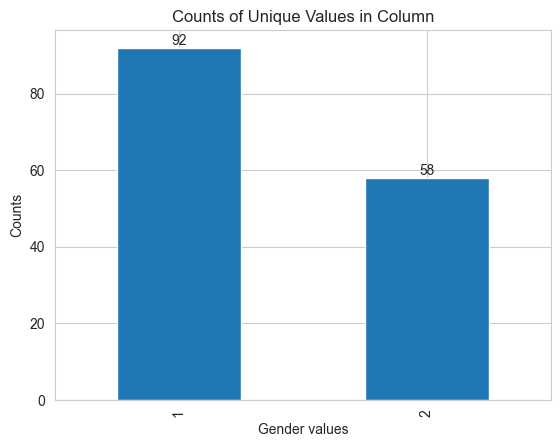

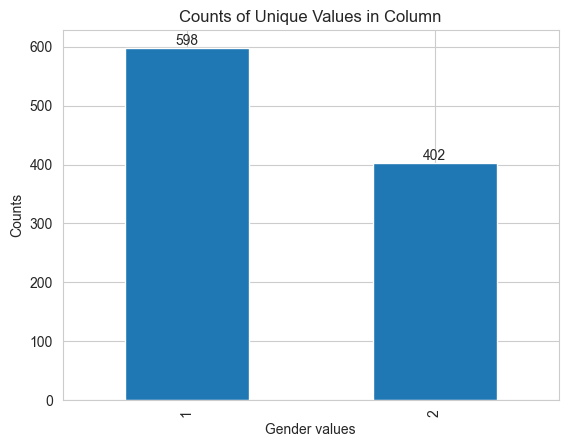

In [95]:
 #For age there is difference in the dataset but this has been slightly better by using specific age groups that make the gaps smaller. Therefore gender will be used in the mitigating bias part.

# Get the counts of unique values in the column
Gencount = catdf['Gender'].value_counts()

# Create a bar plot
Gencount.plot(kind='bar')

# Add labels and title
plt.xlabel('Gender values')
plt.ylabel('Counts')
plt.title('Counts of Unique Values in Column')

# Print counts on top of bars
for index, value in enumerate(Gencount):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()

# Get the counts of unique values in the column
Gencount = CancerData['Gender'].value_counts()

# Create a bar plot
Gencount.plot(kind='bar')

# Add labels and title
plt.xlabel('Gender values')
plt.ylabel('Counts')
plt.title('Counts of Unique Values in Column')

# Print counts on top of bars
for index, value in enumerate(Gencount):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()

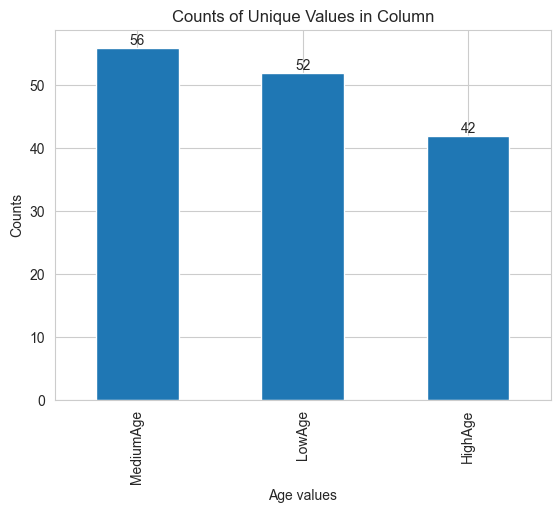

In [98]:
 #For age there is difference in the dataset but this has been slightly better by using specific age groups that make the gaps smaller. Therefore gender will be used in the mitigating bias part.

# Get the counts of unique values in the column
Agecount = catdf['Age_Category'].value_counts()

# Create a bar plot
Agecount.plot(kind='bar')

# Add labels and title
plt.xlabel('Age values')
plt.ylabel('Counts')
plt.title('Counts of Unique Values in Column')

# Print counts on top of bars
for index, value in enumerate(Agecount):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Show plot
plt.show()


In [101]:
# in the dataset show what the attribute is to investigate and the priviledged classes in this attribute.

#Mitdf['protected_attribute'] = 'Gender'
#Mitdf['priviledged_classes'] = 0

In [102]:
#Splitting the code in test and train data, 30% is test data
#Mitdftrain, Mitdftest = Mitdf.split([0.7], shuffle=True)

#privileged_groups = [{'age': 1}]
#unprivileged_groups = [{'age': 0}]

AttributeError: 'DataFrame' object has no attribute 'split'

In [103]:
# Splitting the data into training and testing sets, 70% training and 30% testing
Mitdftrain, Mitdftest = train_test_split(Mitdf, test_size=0.3, shuffle=True)

# Define privileged and unprivileged groups
privileged_groups = [{'age': 0}]
unprivileged_groups = [{'age': 1}]

Now detecting the bias in the dataset

In [104]:
Mitdftrain = BinaryLabelDatasetMetric(Mitdftrain, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

NameError: name 'BinaryLabelDatasetMetric' is not defined

HERE THE REPEAT OF THE ANALYSIS NOW USING THE PREDICTIVE METHOD 


In [ ]:

# Step 7: Predictions
# Use the trained model to make predictions on new data

import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Step 2: Data preprocessing
# Assuming 'Level' is the target variable
X = data.drop(['Patient Id', 'Level'], axis=1)  # Features
y = data['Level']  # Target

# Step 3: Feature selection (you can replace this with your own feature selection technique)
# For demonstration, let's use all features
selected_features = X.columns

# Step 4: Split the dataset into training, validation and testing sets

# First, split the data into training and temporary (remaining) data
X_train_main, X_remaining_main, y_train_main, y_remaining_main = train_test_split(X, y, test_size=0.3, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid_main, X_test_main, y_valid_main, y_test_main = train_test_split(X_remaining_main, y_remaining_main, test_size=0.5, random_state=42)

# You can print the sizes of the datasets to confirm the splits
print("Training data size:", X_train_main.shape)
print("Validation data size:", X_valid_main.shape)
print("Test data size:", X_test_main.shape)

# Define models for cross-validation
log_reg = LogisticRegression(random_state=42)
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

# Perform cross-validation with 5 folds
models = [('Logistic Regression', log_reg), 
          ('Decision Tree', dec_tree), 
          ('Random Forest', rand_forest), 
          ('Naive Bayes', naive_bayes)]

for name, model in models:
    scores = cross_val_score(model, X_train_main, y_train_main, cv=5, scoring='accuracy')
    print(f'{name}: Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}')

# Build ensemble predictor
ensemble = VotingClassifier(estimators=models, voting='hard')

# Train ensemble predictor on the entire training data
ensemble.fit(X_train_main, y_train_main)

# Evaluate ensemble predictor on the validation data
ensemble_accuracy = ensemble.score(X_valid_main, y_valid_main)
print(f'Ensemble Predictor Accuracy on Validation Data: {ensemble_accuracy:.4f}')

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_main, y_train_main)

# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train_main.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Model')
plt.show()

# Display the feature importances
print(feature_importance_df)

# Define the variables (features) you want to include
selected_features = ['Air Pollution', 'Wheezing', 'Obesity', 'Snoring', 'Coughing of Blood', 'Clubbing of Finger Nails']

# Subset the dataset to include only the selected features and the target variable
subset_data = data[selected_features + ['Level']]

# Split the dataset into training and testing sets
X = subset_data.drop('Level', axis=1)  # Features
y = subset_data['Level']  # Target
# First, split the data into training and temporary (remaining) data
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the remaining data into validation and test sets
X_valid, X_test_more, y_valid, y_test_more = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

X_train1, X_train_remaining, y_train1, y_train_remaining = train_test_split(X_train, y_train, test_size=0.75, random_state=42)

X_train2, X_train_remaining, y_train2, y_train_remaining = train_test_split(X_train_remaining, y_train_remaining, test_size=0.6666, random_state=42)

X_train3, X_train4, y_train3, y_train4 = train_test_split(X_train_remaining, y_train_remaining, test_size=0.5, random_state=42)

# You can print the sizes of the datasets to confirm the splits
print("Training data 1 size:", X_train1.shape)
print("Training data 2 size:", X_train2.shape)
print("Training data 3 size:", X_train3.shape)
print("Training data 4 size:", X_train4.shape)
print("Validation data size:", X_valid.shape)
print("Test data size:", X_test_more.shape)

# Train the machine learning model
dt_classifier.fit(X_train1, y_train1)
dt_classifier.fit(X_train2, y_train2)
dt_classifier.fit(X_train3, y_train3)
dt_classifier.fit(X_train4, y_train4)

# Make predictions on the test set
y_pred_more = dt_classifier.predict(X_test_more)

# Evaluate the model
accuracy = accuracy_score(y_test_more, y_pred_more)
print("Accuracy on test data:", accuracy)

dt_classifier_accuracy = dt_classifier.score(X_valid, y_valid)
print(f'{dt_classifier}: Accuracy on validation: {dt_classifier_accuracy:.4f}')


# Get feature importances
importances = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Decision Tree Model')
plt.show()

# Display the feature importances
print(feature_importance_df)

In [ ]:
#For simplicity sake, the same code will be used, except the values X_test will be transformed to X_test_more same goes for y_test and y_pred
X_test = X_test_more
y_test = y_test_more
y_pred = y_pred_more

The variables used in this analysis are different because of the used predictive analysis
Coughing of Blood
Wheezing
Snoring   

these variables are highest in the next analysis so these will be used for this analysis

In [ ]:
num_rows = len(y_pred_more)
print("Number of rows:", num_rows)

In [ ]:
#Using the test data generated in the predictive approach, first take a look at the data
print(f' this is X_test:{X_test}')
print(f' this is y_test: {y_test}')
print(f' this is y_pred: {y_pred}')

In [ ]:
#To be able to form one dataframe the types will be investigated
print(type(y_pred))
print(type(y_test))
print(type(X_test))

In [ ]:
#Also, to ensure that the rows have equal amounts in the dataframe and thus can align, the number of rows will be shown

num_rows = len(y_pred)
print("Number of rows y_pred:", num_rows)

num_rows = len(y_test)
print("Number of rows y_test:", num_rows)

num_rows2 = len(X_test)
print('Number of rows X_test:', num_rows2)

In [ ]:
# Here the y_test will be added to the X_test already existing dataframe
# Extra check if the lengths match
if len(X_test) == len(y_test):
    # Add the Series as a new column to the DataFrame
    X_test['y_test'] = y_test.values
    # Print the DataFrame to verify the changes
    print(X_test)
else:
    print("Lengths of DataFrame and Series do not match.")

In [ ]:
# Here the y_pred will be added to the X_test already existing dataframe
# Check if the lengths match
if len(X_test) == len(y_pred):
    # Add the NumPy array as a new column to the DataFrame
    X_test['y_pred'] = y_pred
    # Print the DataFrame to verify the changes
    print(X_test)
else:
    print("Lengths of DataFrame and NumPy array do not match.")

In [ ]:
# Rename the DataFrame
dfbias = X_test.copy()

# Print the DataFrame to verify the changes
print(dfbias)

In [ ]:
#change the last columns name, the predictions column to 'Prediction'
# Rename the column from 'y_pred' to 'Prediction'
dfbias = dfbias.rename(columns={'y_pred': 'Prediction'})

# Print the DataFrame with the renamed column

dfbias

In [ ]:
#Possibly removing of rows with missing data

# Remove rows with missing data (NaN values)
dfbias_clean = dfbias.dropna()

# Print the cleaned DataFrame
print(dfbias_clean)

Now to decide what we use as sensitive data:

The columns that will be used are:
'Coughing of Blood', 'Wheezing' 'Snoring'

In [ ]:
#Change 'y_test' column values of Low = 0 and Medium and High = 1

#Make a copy of the dataframe
dfbias_clean_copy = dfbias_clean.copy()

mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Replace values in the 'Level' column using the mapping dictionary
dfbias_clean_copy['y_test'] = dfbias_clean_copy['y_test'].replace(mapping)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)


In [ ]:
#First Coughing of Blood



# Extract unique values
CoughingOfBlood_values = dfbias_clean_copy['Coughing of Blood'].unique()
#order the values
CoughingOfBlood_values_sorted = sorted(CoughingOfBlood_values)
print(f"The unique values of Coughing of Blood are: {CoughingOfBlood_values_sorted}")

# Adding labels and title
plt.xlabel('Coughing Of Blood')
plt.ylabel('Count')
plt.title('Distribution of Coughing of blood in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Coughing of Blood', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Adjust the rotation angle as needed


# Show the plot
plt.show()



In [ ]:
#Second Wheezing


# Extract unique values
Wheezing_values = dfbias_clean_copy['Wheezing'].unique()
Wheezing_values_sorted = sorted(Wheezing_values)
print(f"The unique values of Wheezing are: {Wheezing_values_sorted}")



# Adding labels and title
plt.xlabel('Wheezing')
plt.ylabel('Count')
plt.title('Distribution of Wheezing in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Wheezing', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed


# Show the plot
plt.show()

In [ ]:
#Third Snoring
# Extract unique values
Snoring_values = dfbias_clean_copy['Snoring'].unique()
#order the values
Snoring_values_sorted = sorted(Snoring_values)
print(f"The unique values of Snoring are: {Snoring_values_sorted}")


# Adding labels and title
plt.xlabel('Snoring')
plt.ylabel('Count')
plt.title('Distribution of Snoring in Cancer Data')

# Plot with hue='Level'
sns.countplot(x='Snoring', data=dfbias_clean_copy, hue='y_test')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)  # Adjust the rotation angle as needed


# Show the plot
plt.show()






In [ ]:
#change the column names from 'Predictive' to 'Score' and change the values of medium and high to 1, low to 0
#change 'y_test' to 'label_value'

# Change the column names
# Rename the columns
dfbias_clean_copy.rename(columns={'y_test': 'label_value', 'Prediction': 'score'}, inplace=True)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)

In [ ]:
#Change the values of Low = 0 and Medium and High = 1, for the column score

# Define the mapping dictionary
mapping = {'Low': 0, 'Medium': 1, 'High': 1}

# Replace values in the 'score' column using the mapping dictionary
dfbias_clean_copy['score'] = dfbias_clean_copy['score'].replace(mapping)

# Print the DataFrame to verify the changes
print(dfbias_clean_copy)

In [ ]:
# Create a copy of dfbias_clean_copy to work with
dfSTR = dfbias_clean_copy.copy()

# List of columns to exclude from conversion
exclude_columns = ['label_value', 'score']

# Convert all columns except 'label_value' and 'score' to string type (To make sure it is compatible)
for column in dfSTR.columns:
    if column not in exclude_columns:
        dfSTR[column] = dfSTR[column].astype(str)

# Print the new DataFrame dfSTR
print(dfSTR.dtypes)

In [ ]:


group = Group()
xtab, _ = group.get_crosstabs(dfSTR)



In [ ]:


absolute_metrics = group.list_absolute_metrics(xtab)




In [ ]:


xtab[[col for col in xtab.columns if col not in absolute_metrics]]



In [ ]:

xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)



In [ ]:
# Since almost everything is in levels of 8, there will be categories made per attribute. These will be in the form of low, medium, high, where low will be the categories 1,2,3 medium 3, 4, 5 and high 6, 7, 8

#create a new dataframe a copy of the previous one to make categories, using df bias_clean_copy because here the types are still integers
#show types
print(dfbias_clean_copy.dtypes)

#create a new dataframe
catdf = dfbias_clean_copy.copy()

catdf



In [ ]:
#As mentioned before, not all columns will be used for this analysis, therefore other columns have to be dropped, the columns that will stay are, Wheezing, Snoring, Coughing of blood, because this dataframe is based on the previous one, only certain columns are left, and therefore only certain columns need to be dropped. 

catdf.drop(columns=['Air Pollution', 'Obesity', 'Clubbing of Finger Nails'], inplace=True)

print(catdf)


In [ ]:
# Find the minimum values of all columns
min_values = catdf.min()

# Find the maximum values of all columns
max_values = catdf.max()

# Print the minimum and maximum values of all columns
print("Minimum values:")
print(min_values)
print("Maximum values:")
print(max_values)


In [ ]:
# Define the mapping dictionary
mapping = {1: 'LowWhe', 2: 'LowWhe', 3: 'LowWhe',
           4: 'MedWhe', 5: 'MedWhe',
           6: 'HighWhe', 7: 'HighWhe', 8: 'HighWhe'}

# Replace values in the 'Occupational Hazards' column using the mapping dictionary
catdf['Wheezing'] = catdf['Wheezing'].replace(mapping)

# Print the DataFrame to verify the changes
print(catdf)

In [ ]:
# Define the mapping dictionary
mapping = {1: 'LowSnore', 2: 'LowSnore', 3: 'LowSnore',
           4: 'MedSnore', 5: 'MedSnore',
           6: 'HighSnore', 7: 'HighSnore', }

# Replace values in the 'Occupational Hazards' column using the mapping dictionary
catdf['Snoring'] = catdf['Snoring'].replace(mapping)

# Print the DataFrame to verify the changes
print(catdf)

In [ ]:
# Define the mapping dictionary
mapping = {1: 'LowCoB', 2: 'LowCoB', 3: 'LowCoB',
           4: 'MedCoB', 5: 'MedCoB', 6: 'MedCoB', 7: 'HighCoB', 8: 'HighCoB', 9: 'HighCoB'}

# Replace values in the 'Occupational Hazards' column using the mapping dictionary
catdf['Coughing of Blood'] = catdf['Coughing of Blood'].replace(mapping)

# Print the DataFrame to verify the changes
print(catdf)

In [ ]:
#Check the types of the dataframe
print(catdf.dtypes)


In [ ]:
#Now do the analysis for these categories:
#Change it to string

# Create a copy of dfbias_clean_copy to work with
catSTR = catdf.copy()

# List of columns to exclude from conversion
exclude_columns = ['label_value', 'score']

# Convert all columns except 'label_value' and 'score' to string type (To make sure it is compatible)
for column in catSTR.columns:
    if column not in exclude_columns:
        catSTR[column] = catSTR[column].astype(str)

# Print the new DataFrame dfSTR
print(catSTR.dtypes)

In [ ]:
group = Group()
xtab, _ = group.get_crosstabs(catSTR)

In [ ]:
absolute_metrics = group.list_absolute_metrics(xtab)

In [ ]:
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

In [ ]:
xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)

In [ ]:
bias = Bias()


In [ ]:
bias_df = bias.get_disparity_predefined_groups(xtab, original_df=catSTR,
                                        ref_groups_dict={'Wheezing':'MedWhe', 'Snoring':'LowSnore', 'Coughing of Blood':'HighCoB'},
                                        alpha=0.05, check_significance=True,
                                        mask_significance=True)
bias_df.style


In [ ]:
# View disparity metrics added to dataframe
bias_df[['attribute_name', 'attribute_value'] +
     bias.list_disparities(bias_df) + bias.list_significance(bias_df)].style

*Here the BIAS analysis starts*

We use the 'CancerData' dataframe and make a copy of it to be able to change the data, but will switch the 'level'column instead of low-medium-high to the values 1-2-3.

In [ ]:
Bdf = CancerData.copy()

In [ ]:
Bdf.head()

In [ ]:
# Mapping dictionary for replacement
mapping = {'Low': 1, 'Medium': 2, 'High': 3}

# Replace values in 'level' column using the mapping dictionary
Bdf['Level'] = Bdf['Level'].replace(mapping)

Bdf

Historical biases 

Eventhough it might be true, or not, historical biases are biases that imply stereotypes to the data. 
 First, it is seen that the older people get the more likely they will have cancer. (https://www.webmd.com/cancer/cancer-incidence-age)
Then it is said that men are more likely to get cancer in general than women. (https://www.wcrf.org/cancer-trends/worldwide-cancer-data/)

In [ ]:
#Amount of new cancer cases for men in 2020 with cancer according to WCRF.org
WCRF_men = 9342957
#Amount of new cancer cases for men in 2020 with cancer according to WCRF.org
WCRF_women = 8751759
#Translate it into percentages because then it is easier to compare to the data in our dataset
WCRF_menP = WCRF_men / (WCRF_men + WCRF_women) * 100 
WCRF_womenP = WCRF_women / (WCRF_men + WCRF_women) * 100

#Translate our data to percentages as well
Total_count_G = Bdf['Gender'].value_counts()
print(Total_count_G)


# Get the count of 1 and 2
Count_G_1 = Total_count_G.get(1, 0)  # If 1 doesn't exist, default to 0
Count_G_2 = Total_count_G.get(2, 0)  # If 2 doesn't exist, default to 0

#As discussed before, 1 is for males and 2 is for females
print("Count of Males in 'Gender':", Count_G_1)
print("Count of Females in 'Gender':", Count_G_2)

Count_G_1P = Count_G_1 / (Count_G_1 + Count_G_2) * 100 
Count_G_2P = Count_G_2 / (Count_G_1 + Count_G_2) * 100


In [ ]:
#plot the percentages in a metric, with  our data as barplots and the reallife data as dots in the bar plot

# Create bar plot
labels = ['males', 'females']
values = [Count_G_1P, Count_G_2P]
colors = ['blue', 'green']

plt.bar(labels, values, color=colors)

# Add big red dots
plt.scatter(labels[0], WCRF_menP, color='red', s=200, label='real life distribution new cancer cases 2020 (Males)')
plt.scatter(labels[1], WCRF_womenP, color='purple', s=200, label='real life distribution new cancer cases in 2020 (Females)')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Bar plot of Count_G_1P and Count_G_2P')

# Add more space to the top of the plot
plt.ylim(0, 80)  # Adjust the upper limit of the y-axis

# Show plot
plt.show()

#This shows that there are more cancer counts in the data, which might be a bias. BEcause men are seen to have cancer more often. 

In [ ]:
#Under 20: 1%, 20-34: 3%, 35-44: 5%, 45-54: 14%, 55-64: 24%, 65-74: 25%, 75-84: 20%, 85 and over: 8% from https://www.webmd.com/cancer/cancer-incidence-age, the cancer cases by age groups in the US

#To change them into useable variables
# Define age distribution percentages
age_distribution = {
    'Under 20': 1,
    '20-34': 3,
    '35-44': 5,
    '45-54': 14,
    '55-64': 24,
    '65-74': 25,
    '75-84': 20,
    '85 and over': 8
}

# Test: Output the age distribution percentages
for age_range, percentage in age_distribution.items():
    print(f"{age_range}: {percentage}%")

In [ ]:
# Define age groups and their corresponding ranges
age_groups = {
    'Under 20 D': (0, 20),
    '20-34 D': (20, 35),
    '35-44 D': (35, 45),
    '45-54 D': (45, 55),
    '55-64 D': (55, 65),
    '65-74 D': (65, 75),
    '75-84 D': (75, 85),
    '85 and over D': (85, float('inf'))  # Use 'inf' for infinity
}

# Bin the 'Age' column into the defined age groups
Bdf['Age Group'] = pd.cut(Bdf['Age'], bins=[age_range[0] for age_range in age_groups.values()] + [float('inf')],
                          labels=age_groups.keys(), right=False)

# Count the occurrences of each age group
age_group_counts = Bdf['Age Group'].value_counts()

# Calculate the percentage of each age group relative to the total number of rows
total_rows = len(Bdf)
age_group_percentages = (age_group_counts / total_rows) * 100

# Display the percentage of each age group
print("Percentage of each age group relative to the whole dataframe:")
print(age_group_percentages)

In [ ]:
# Additional data, to add the comparison with the real life data
age_distribution = {
    'Under 20': 1,
    '20-34': 3,
    '35-44': 5,
    '45-54': 14,
    '55-64': 24,
    '65-74': 25,
    '75-84': 20,
    '85 and over': 8
}

# Sample data (replace this with your actual data)
age_group_percentages = pd.Series({
    '19 and under D': 10,
    '20-34 D': 15,
    '35-44 D': 20,
    '45-54 D': 25,
    '55-64 D': 18,
    '65-74 D': 8,
    '75-84 D': 3,
    '85 and over D': 1
})

# Sort the age_group_percentages Series by index (which are the age group labels)
age_group_percentages_sorted = age_group_percentages.sort_index()

# Plot the percentages
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Plot the bar chart
age_group_percentages_sorted.plot(kind='bar', color='skyblue', label='Percentage from data')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of Each Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add data labels
for i, v in enumerate(age_group_percentages_sorted):
    plt.text(i, v + 0.5, f"{v}%", ha='center', va='bottom')

# Add legend with one dot for the red dot
plt.legend(handles=[plt.scatter([], [], color='red', s=100)], labels=['The real value of cancer cases in the UK'])

# Add big red dots for the additional data
for i, (age_range, percentage) in enumerate(age_distribution.items()):
    plt.scatter(i, percentage, color='red', s=100, zorder=5)

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


This is a very interesting graph as it show a clear opposite of what is expected.

#CHECK This dataframe 'cancer_df' if it works!!! (Juriaan's part (if it is imported in the python code)

In [ ]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(cancer_df, columns=['Gender', 'Level'], drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming all other columns are numerical
numerical_columns = df_encoded.columns.difference(['Patient Id', 'Gender_M', 'Level_Moderate', 'Level_Severe'])
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [24]:
# Analyzing representation bias
gender_distribution = cancer_df['Gender'].value_counts(normalize=True)
age_distribution = cancer_df['Age'].value_counts(bins=5, normalize=True)  # Adjust bins as appropriate

print(gender_distribution)
print(age_distribution)

NameError: name 'cancer_df' is not defined